# Scale Space via Gaussian Pyramids

> - Corner detection is not scale invariant
> - Therefore, corner detection should take place at multiple scales.
> - This leads to the concept of a scale space.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/My Drive/ComputerVision_Shared/Corner_Detection_Code/'

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

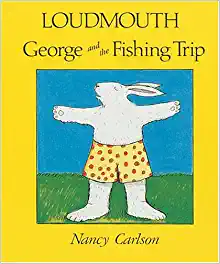

In [8]:
# Read the image
orig_image = cv2.imread(path+'book.png')
cv2_imshow(orig_image)

(220, 264, 3)


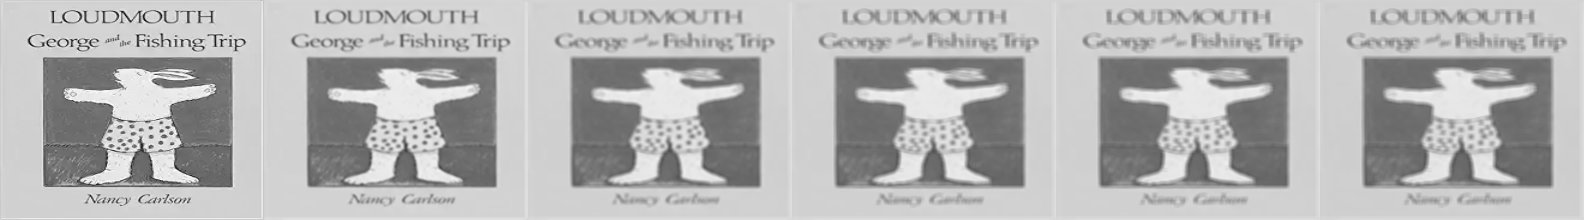

(110, 132, 3)


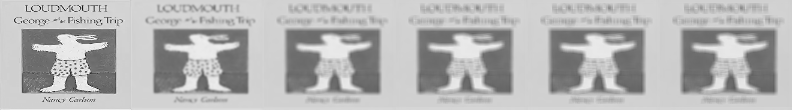

(55, 66, 3)


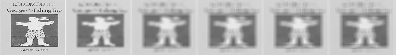

In [9]:
for i in range(3):
    img = orig_image
    row, col, channel = img.shape
    img = cv2.resize(img, (row // (2**i), col // (2**i)))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    result = gray
    print(img.shape)
    
    for j in range(5):        
        smoothed_img = cv2.GaussianBlur(gray, (5,5), 2**j, 2**j)   
        result = cv2.hconcat([result, smoothed_img])         
    cv2_imshow(result)

(220, 264, 3)


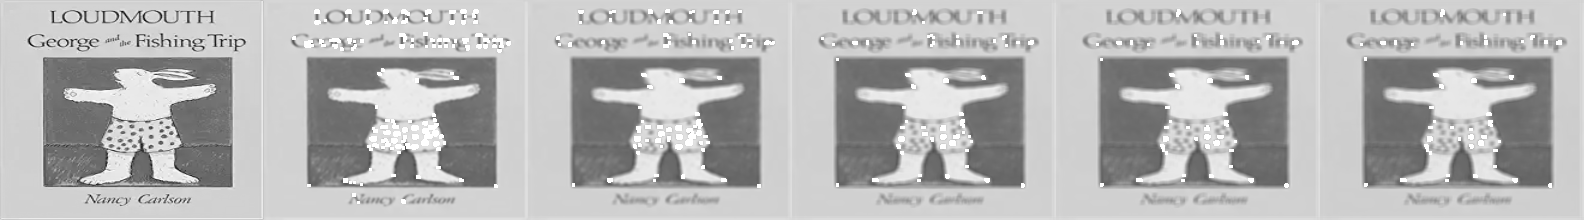

(110, 132, 3)


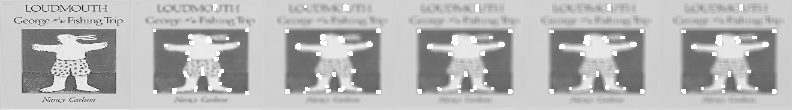

(55, 66, 3)


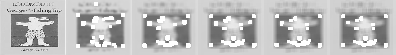

In [25]:
for i in range(3):
    img = orig_image
    row, col,channel = img.shape
    img = cv2.resize(img, (row // (2**i), col // (2**i)))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    result = gray
    print(img.shape)
    
    for j in range(5):        
        smoothed_img = cv2.GaussianBlur(gray, (5, 5), 2**j, 2**j) 
        dst = cv2.cornerHarris(smoothed_img, 3, 3, 0.04)
        dst = cv2.dilate(dst, None)
        smoothed_img[dst > 0.2 * dst.max()] = 255       
        result = cv2.hconcat([result, smoothed_img])
    
    cv2_imshow(result)